一些參考資料
>
> [Pandas索引的運用](https://ithelp.ithome.com.tw/articles/10194006?sc=hot)
>
> [什麼是文字探勘](https://www.tibco.com/zh-hant/reference-center/what-is-text-mining)

In [3]:
import jieba
import jieba.analyse
import pandas as pd
import numpy
from collections import Counter

In [4]:
orgdata = pd.read_csv('Job vacancy list.csv')

In [5]:
orgdata.head()

,OCCU_DESC,WK_TYPE,CJOB_TYPE,CJOB_NAME1,CJOB_NO,CJOB_NAME2,AVAILREQNUM,STOP_DATE,JOB_DETAIL,CITYNAME,EXPERIENCE,WKTIME,SALARYCD,SALARY_L,SALARY_U,EDGRDESC,URL_QUERY,COMPNAME,TRANDATE
0,雲端工程師(此為現場徵才活動職缺),全職,8,資訊／軟體／系統,80202,軟(韌)體設計工程師,2,20221112,1.對系統架構、程式邏輯有概念、熟演算法。2.熟悉Kubernetes、Docker、Nod...,台北市信義區,1年以上,日班,月薪,40000.0,60000.0,大學,https://job.taiwanjobs.gov.tw/Internet/jobwant...,乒乓話網股份有限公司,20221017
1,愛心通用計程車駕駛員,全職,15,物流／運輸／資材,150101,運輸交通專業人員,10,額滿為止,工作內容：1.裝有輪椅升降機之車輛駕駛員2.協助長者及身障者乘客上下車3.注意車輛清潔及定保...,台北市不限,無,日班,月薪,28000.0,33000.0,不拘,https://job.taiwanjobs.gov.tw/Internet/jobwant...,生豐交通有限公司,20221027
2,正職行政人員(南京復興教學中心),全職,14,教育／學術／研究,140190,其他補習班老師,1,額滿為止,1.教學中心櫃檯接待2.學員及家長服務3.教學中心學員相關事務處理4.招生、續班相關活動配合...,台北市中山區,無,中班,月薪,30000.0,33000.0,專科,https://job.taiwanjobs.gov.tw/Internet/jobwant...,傑優文化事業股份有限公司,20221104
3,照顧服務員,兼職,17,醫療／美容／保健,170113,照顧服務員,20,20221113,居家照顧服務:(1)身體照顧:為身體失能個案沐浴、更衣、扶持上下床及陪同散步等等 (2)日常...,台北市信義區,無,日班、部份工時：08時30分至18時30分,時薪,200.0,334.0,不拘,https://job.taiwanjobs.gov.tw/Internet/jobwant...,北醫大管理顧問股份有限公司附設私立君蔚居家長照機構,20221027
4,(日文)門市銷售專員/儲備幹部(專業培養)-松山機場(早班),全職,6,客服／門市,60203,專櫃／門市（人員／儲備幹部）,2,額滿為止,此職務9月將於松山機場2F上班(非管制區)，9月前於台北其它門店訓練* 上班時間依機場之商場...,台北市松山區,1年以上,日班、夜班,月薪,28000.0,35000.0,大學,https://job.taiwanjobs.gov.tw/Internet/jobwant...,王德興茶業股份有限公司,20221020


In [6]:
documents = ['我是國立臺灣師範大學科技系二年級吳亞蓉']
# 精確模式
for sentence in documents:
    seg_list = jieba.cut(sentence)
    print('/'.join(seg_list))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\happy\AppData\Local\Temp\jieba.cache
Loading model cost 0.627 seconds.
Prefix dict has been built successfully.


我/是/國立/臺/灣師/範大學/科技/系/二年/級/吳亞蓉


In [7]:
jieba.load_userdict('./userdict.txt') #userdict 自己的斷詞字典(自己建立)

for sentence in documents: #從文章中取出第一句話
    seg_list = jieba.cut(sentence) #用結巴 cut 斷詞
    print('/'.join(seg_list)) #並將斷詞用 / 隔開

我/是/國立臺灣師範大學/科技系/二年級/吳亞蓉


In [8]:
orgdata['seg'] = ""
orgdata.head()

,OCCU_DESC,WK_TYPE,CJOB_TYPE,CJOB_NAME1,CJOB_NO,CJOB_NAME2,AVAILREQNUM,STOP_DATE,JOB_DETAIL,CITYNAME,EXPERIENCE,WKTIME,SALARYCD,SALARY_L,SALARY_U,EDGRDESC,URL_QUERY,COMPNAME,TRANDATE,seg
0,雲端工程師(此為現場徵才活動職缺),全職,8,資訊／軟體／系統,80202,軟(韌)體設計工程師,2,20221112,1.對系統架構、程式邏輯有概念、熟演算法。2.熟悉Kubernetes、Docker、Nod...,台北市信義區,1年以上,日班,月薪,40000.0,60000.0,大學,https://job.taiwanjobs.gov.tw/Internet/jobwant...,乒乓話網股份有限公司,20221017,
1,愛心通用計程車駕駛員,全職,15,物流／運輸／資材,150101,運輸交通專業人員,10,額滿為止,工作內容：1.裝有輪椅升降機之車輛駕駛員2.協助長者及身障者乘客上下車3.注意車輛清潔及定保...,台北市不限,無,日班,月薪,28000.0,33000.0,不拘,https://job.taiwanjobs.gov.tw/Internet/jobwant...,生豐交通有限公司,20221027,
2,正職行政人員(南京復興教學中心),全職,14,教育／學術／研究,140190,其他補習班老師,1,額滿為止,1.教學中心櫃檯接待2.學員及家長服務3.教學中心學員相關事務處理4.招生、續班相關活動配合...,台北市中山區,無,中班,月薪,30000.0,33000.0,專科,https://job.taiwanjobs.gov.tw/Internet/jobwant...,傑優文化事業股份有限公司,20221104,
3,照顧服務員,兼職,17,醫療／美容／保健,170113,照顧服務員,20,20221113,居家照顧服務:(1)身體照顧:為身體失能個案沐浴、更衣、扶持上下床及陪同散步等等 (2)日常...,台北市信義區,無,日班、部份工時：08時30分至18時30分,時薪,200.0,334.0,不拘,https://job.taiwanjobs.gov.tw/Internet/jobwant...,北醫大管理顧問股份有限公司附設私立君蔚居家長照機構,20221027,
4,(日文)門市銷售專員/儲備幹部(專業培養)-松山機場(早班),全職,6,客服／門市,60203,專櫃／門市（人員／儲備幹部）,2,額滿為止,此職務9月將於松山機場2F上班(非管制區)，9月前於台北其它門店訓練* 上班時間依機場之商場...,台北市松山區,1年以上,日班、夜班,月薪,28000.0,35000.0,大學,https://job.taiwanjobs.gov.tw/Internet/jobwant...,王德興茶業股份有限公司,20221020,


In [9]:
jieba.analyse.set_stop_words('stopwords.txt') #stopwords 自己不要的字的字典(自己建立)
index = 0
for documents in orgdata['JOB_DETAIL']: #從 csv. 檔中的 JOB_DETAIL 欄位中找尋資料
    seg_list = jieba.analyse.extract_tags(documents, 150) #150 為前150個權重最高的單詞
    #seg_list = jieba.lcut(documents)
    orgdata['seg'].iloc[index] = seg_list
    index += 1

C:\Users\happy\AppData\Local\Temp\ipykernel_3200\1649042026.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orgdata['seg'].iloc[index] = seg_list


[提取關鍵字](https://ithelp.ithome.com.tw/articles/10204535)
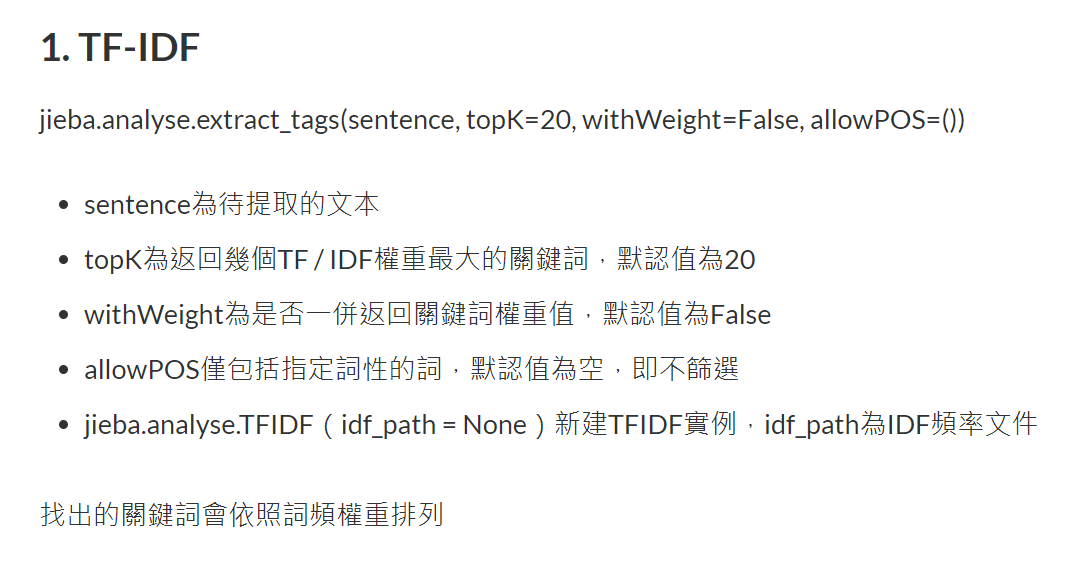

In [10]:
orgdata['seg']

0      [活動, 111, 11, 12, 程式, 市政府, 熟悉, 北市, 對系, 統架構, 邏輯...
1      [愛心, 乘客, 裝有, 輪椅, 機之車輛, 駕駛員, 協助長, 身障者, 車輛, 清潔, ...
2      [教學, 相關, 活動, 中心, 學員及, 家長, 服務, 學員, 事務, 處理, 續班, ...
3      [照顧, 身體, 陪同, 上下床, 生活照, 服務, 失能, 個案, 簡易家務, 備餐, 醫...
4      [專業, 我們, 台北市, 發展, 早班, 台北, 職務, 機場, 10, 大安, 松山, ...
                             ...                        
995      [管理, 內外場, SQC, 執行, 落實, 設備, 維護, 工作站, 物料, 客服, 操作]
996    [營業, 作業, 前置, 店鋪, 維護, 單位, 清潔, 內場, 備料, 出餐, 簡易, 飲...
997    [進行, 須內, 外場, 送單, 收銀, 將菜, 單遞, 交顧客, 答覆有, 關餐, 問題,...
998    [案點, 現場, 作業, 人員調, 業務拜, 訪及, 開發, 客戶, 市場, 以達, 成業績...
999    [顧客, 食材, 服務夥伴, 服務, 內場, 分切, 外場, 整潔, 點餐, 建議, 桌邊,...
Name: seg, Length: 1000, dtype: object

In [11]:
job_type_split = orgdata['JOB_DETAIL'].iloc[0].split('.')

In [12]:
job_type_split[0]

'1'

In [13]:
orgdata['DETAIL'] = ""
index = 0
for documents in orgdata['JOB_DETAIL']:
    date_split = documents.split('.')
    orgdata['DETAIL'].iloc[index] = job_type_split[0]
    index += 1

C:\Users\happy\AppData\Local\Temp\ipykernel_3200\1191453595.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orgdata['DETAIL'].iloc[index] = job_type_split[0]


In [14]:
orgdata.head()

,OCCU_DESC,WK_TYPE,CJOB_TYPE,CJOB_NAME1,CJOB_NO,CJOB_NAME2,AVAILREQNUM,STOP_DATE,JOB_DETAIL,CITYNAME,...,WKTIME,SALARYCD,SALARY_L,SALARY_U,EDGRDESC,URL_QUERY,COMPNAME,TRANDATE,seg,DETAIL
0,雲端工程師(此為現場徵才活動職缺),全職,8,資訊／軟體／系統,80202,軟(韌)體設計工程師,2,20221112,1.對系統架構、程式邏輯有概念、熟演算法。2.熟悉Kubernetes、Docker、Nod...,台北市信義區,...,日班,月薪,40000.0,60000.0,大學,https://job.taiwanjobs.gov.tw/Internet/jobwant...,乒乓話網股份有限公司,20221017,"[活動, 111, 11, 12, 程式, 市政府, 熟悉, 北市, 對系, 統架構, 邏輯...",1
1,愛心通用計程車駕駛員,全職,15,物流／運輸／資材,150101,運輸交通專業人員,10,額滿為止,工作內容：1.裝有輪椅升降機之車輛駕駛員2.協助長者及身障者乘客上下車3.注意車輛清潔及定保...,台北市不限,...,日班,月薪,28000.0,33000.0,不拘,https://job.taiwanjobs.gov.tw/Internet/jobwant...,生豐交通有限公司,20221027,"[愛心, 乘客, 裝有, 輪椅, 機之車輛, 駕駛員, 協助長, 身障者, 車輛, 清潔, ...",1
2,正職行政人員(南京復興教學中心),全職,14,教育／學術／研究,140190,其他補習班老師,1,額滿為止,1.教學中心櫃檯接待2.學員及家長服務3.教學中心學員相關事務處理4.招生、續班相關活動配合...,台北市中山區,...,中班,月薪,30000.0,33000.0,專科,https://job.taiwanjobs.gov.tw/Internet/jobwant...,傑優文化事業股份有限公司,20221104,"[教學, 相關, 活動, 中心, 學員及, 家長, 服務, 學員, 事務, 處理, 續班, ...",1
3,照顧服務員,兼職,17,醫療／美容／保健,170113,照顧服務員,20,20221113,居家照顧服務:(1)身體照顧:為身體失能個案沐浴、更衣、扶持上下床及陪同散步等等 (2)日常...,台北市信義區,...,日班、部份工時：08時30分至18時30分,時薪,200.0,334.0,不拘,https://job.taiwanjobs.gov.tw/Internet/jobwant...,北醫大管理顧問股份有限公司附設私立君蔚居家長照機構,20221027,"[照顧, 身體, 陪同, 上下床, 生活照, 服務, 失能, 個案, 簡易家務, 備餐, 醫...",1
4,(日文)門市銷售專員/儲備幹部(專業培養)-松山機場(早班),全職,6,客服／門市,60203,專櫃／門市（人員／儲備幹部）,2,額滿為止,此職務9月將於松山機場2F上班(非管制區)，9月前於台北其它門店訓練* 上班時間依機場之商場...,台北市松山區,...,日班、夜班,月薪,28000.0,35000.0,大學,https://job.taiwanjobs.gov.tw/Internet/jobwant...,王德興茶業股份有限公司,20221020,"[專業, 我們, 台北市, 發展, 早班, 台北, 職務, 機場, 10, 大安, 松山, ...",1


In [30]:
Counter(orgdata['DETAIL']).keys()

dict_keys(['資訊／軟體／系統'])